In [3]:
%matplotlib inline

In [ ]:
# FINAL GRADE: 24/25

# 592B Fall 2019 Problem Set 2 due Thurs 09/19 11.59PM

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 

from ipywidgets import interactive
from IPython.display import Audio, display

The audio file in the directory that this notebook is in, `Fa50.wav`, comes from [Sameer ud Dowla Khan](http://www.reed.edu/linguistics/khan/index.html) at Reed College. It is an utterance of Bengali illustrating how Bengali intonational events chunk utterances into prosodic phrases. See page 101 of Khan's [dissertation on Bengali intonation](http://www.reed.edu/linguistics/khan/assets/Khan%202008%20disseration%20Intonational%20phonology%20and%20focus%20prosody%20of%20Bengali.pdf).

Here's an annotated f0 contour of `Fa50.wav` from that page.
![title](Fa50.png)

You will be doing some work with this audio file in this problem set.

## Problem 1: converting from samples to time

Write a function that:
- plots the audio data from `t_start` to `t_stop`, with time in seconds on the x-axis
- creates an Audio object you can play, playing the audio data from `t_start` to `t_stop`.
- if you like, you can generate an interactive "widget" like we saw in the Class 2.2 notebook, where you can manipulate sliders and then see the plot and have the audio change.

You can take a look at the sample code for converting from samples to time in Class 2.2's notebook, but remember that there are problems with that code. You can do way better!

In [ ]:
# PROBLEM 1: 6/6. Please comment and include steps for debugging, checks for user input, etc.

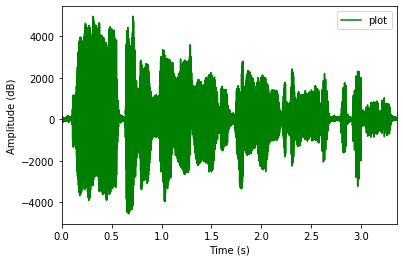

In [6]:
fs_1,audio_1 = wavfile.read("Fa50.wav")
total_sec= len(audio_1)/fs_1
def plotsAndPlay(audio,t_start,t_stop,fs,x_lim_max):
    x = np.linspace(t_start, t_stop, int(fs*(t_stop - t_start)+1))
    start_index= int(fs*t_start)
    end_index=int(fs*t_stop)+1
    audio= audio[start_index:end_index]
    plt.xlim(t_start,x_lim_max)
    plt.plot(x , audio, "-g", label="plot") 
    plt.legend(loc="upper right") 
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (dB)')
    display(Audio(data=audio, rate=fs))

plotsAndPlay(audio_1,0,3.35,fs_1,total_sec)
    

## Problem 2: resampling audio data and writing it to file

The purpose of this problem is to:
- introduce you to [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html), which we will be continuing to use during the course.
- have you figure out how to write data to audio files
- give you experience with figuring out how to use unfamiliar functions own your own
- get you thinking more about the effect of sampling rates on representing signals

*n.b. in my past experience, people have sometimes had problems using `scipy.signal`'s resampling function on their machine. If that ends up being the case for you, you might try instead [`librosa`](https://librosa.github.io/librosa/)'s sampling function.*


1. Resample the bengali audio data using `scipy.signal.resample`, plot the resampled data, and also create a playable Audio object of the resampled data. Do this for two sampling rates: two times the original sampling rate of the file, and half of the original sampling rate of the file. Note: you may need to use `round()` and `int()` to coerce the number of samples to be an integer.
2. Try to explain why the audio sounds the way it does for the upsampled and downsampled audio.
3. Write the re-sampled audio to WAV files in the current directory using `scipy.io.wavfile.write`.
4. Use `scipy.io.wavfile.read` to read in your re-sampled files and check that the sampling rate is what you expect.







In [ ]:
## Grading Notes: 7/7
# 1. correct 2/2
# 2. correct 2/2 
# 3. correct 2/2
# 4. correct 1/1

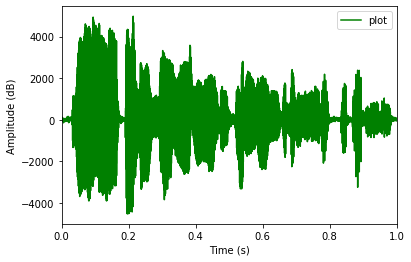

In [8]:
import scipy.signal as signal
new_data_twice=signal.resample(audio_1,fs_1*2)
# display(Audio(data=new_data_twice,rate=fs_1))
# display(Audio(data=new_data_half,rate=fs_1))
plotsAndPlay(new_data_twice,0,1,fs_1*2-1,1)
# total_sec_half= int(len(new_data_half)/fs_1)


"Both audio are resampled with the given condition(two times the original and half of the original.),but was played at its \nsampling rate. The former sounds more like a pitched-up version of the original because of higher sampling rate, the latter sounds\ndeeper and that's because of lower sampling rate"

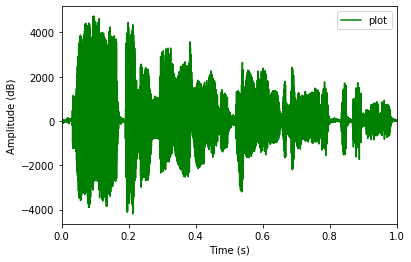

In [9]:
new_data_half=signal.resample(audio_1,int(fs_1/2))
plotsAndPlay(new_data_half,0,1,fs_1/2-1,1)


"""Both audio are resampled with the given condition(two times the original and half of the original.),but was played at its 
sampling rate. The former sounds more like a pitched-up version of the original because of higher sampling rate, the latter sounds
deeper and that's because of lower sampling rate"""

In [10]:
import scipy
scipy.io.wavfile.write("half.wav",int(fs_1/2), new_data_half)
scipy.io.wavfile.write("twice.wav",fs_1*2,new_data_twice)


In [11]:
fs_2,audio_2= wavfile.read("half.wav")
display(Audio(data=audio_2,rate=fs_2 ))
fs_3,audio_3= wavfile.read("twice.wav")
display(Audio(data=audio_3,rate=fs_3))
#it is indeed what we just played earlier

## Problem 3: Fourier series of a square wave

We will be going over the introductory material you need for this on Tuesday 09/17, so feel free to wait until then to get started on this problem if you like.

### Define a square wave.
1. Define a function for a [square wave](http://mathworld.wolfram.com/SquareWave.html) with a period of 1, with y = 1 from x = 0 to 0.5, and y = 0 from x = 0.5 to 1. You might see if there are any functions in `scipy.signal` that could help.
2. Make a plot of your square wave showing 5 periods.

### Reconstruct the square wave using a Fourier series.
1. Calculate the Fourier coefficients for a square wave.  Note: there are an infinite number of
coefficients, so just calculate the first six. Try to find a
pattern for the coefficient values of the infinite series.
2. Plot the individual Fourier series terms, i.e., make plots of each of the following:
\begin{align}
      a_0\\
      a_1\cos(2\pi nt) + b_1\sin(2\pi nt)\\
      a_2\cos(2\pi nt) + b_2\sin(2\pi nt)\\
      a_3\cos(2\pi nt) + b_3\sin(2\pi nt)\\
      a_4\cos(2\pi nt) + b_4\sin(2\pi nt)\\
      a_5\cos(2\pi nt) + b_5\sin(2\pi nt)
\end{align}

3. Plot the reconstruction of the square wave as you add in successive terms in the Fourier series, i.e., make plots of each of the following (I am subsuming $a_0$ as a term in the sum by having the sum start from $n=0$):

\begin{align}
      \displaystyle\sum\limits_{n=0}^0 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
       \displaystyle\sum\limits_{n=0}^1 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
        \displaystyle\sum\limits_{n=0}^2 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
         \displaystyle\sum\limits_{n=0}^3 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
          \displaystyle\sum\limits_{n=0}^4 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
           \displaystyle\sum\limits_{n=0}^5 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
\end{align}


In [ ]:
## Grading notes: 11/12
# Define the square wave
# 1. correct 2/2
# 2. correct 1/1


# Reconstruct using fourier series
# 1. correct, but where are coefficient values? patterns? 2/3
# 2. correct 3/3
# 4. correct 3/3

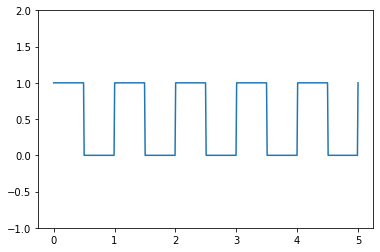

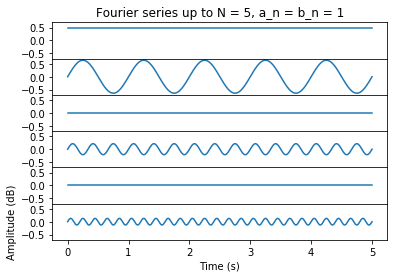

In [12]:
t = np.linspace(0, 5, 500, endpoint=True)
plt.plot(t, 0.5+0.5*signal.square(2*np.pi*t))
plt.ylim(-1,2)
#Through a bit of calculation, we see that a_0 =0.5 a_n= sin(pi*n)/(pi*n), b_n= 2*sin^2(pi*n/2)/(pi*n)
a_0= 0.5
import math
a_n = [math.sin(math.pi*n)/(math.pi*n) for n in range(1,6)]
a_n.insert(0,a_0)
b_n = [2*math.sin(math.pi*n/2)**2/(math.pi*n)for n in range(1,6)]
b_n.insert(0,0)
x = np.linspace(0, 5, 500, endpoint=True)
terms= [a_n[n]*np.cos(2*math.pi*n*x)+b_n[n]*np.sin(2*math.pi*n*x) for n in range(6)]

#material from the notebook was especially helpful
f_fourier_series, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, sharey=True)
ax1.plot(x , terms[0], "-", label="n = 0")
ax1.set_title('Fourier series up to N = 5, a_n = b_n = 1')
ax2.plot(x , terms[1], "-", label="n = 1")
ax3.plot(x , terms[2], "-", label="n = 2")
ax4.plot(x , terms[3], "-", label="n = 3")
ax5.plot(x , terms[4], "-", label="n = 4")
ax6.plot(x , terms[5], "-", label="n = 5")

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')

f_fourier_series.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f_fourier_series.axes[:-1]], visible=False)





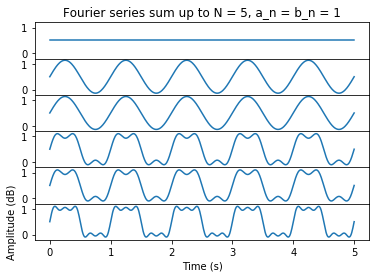

In [13]:
x = np.linspace(0, 5, 500, endpoint=True)
sum = list()
temp= np.zeros(len(terms[0]))
for i in range(6):
    temp= terms[i]+temp
    sum.append(temp)
    
f_fourier_series, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, sharey=True)
ax1.plot(x , sum[0], "-", label="n = 0")
ax1.set_title('Fourier series sum up to N = 5, a_n = b_n = 1')
ax2.plot(x , sum[1], "-", label="n = 1")
ax3.plot(x , sum[2], "-", label="n = 2")
ax4.plot(x , sum[3], "-", label="n = 3")
ax5.plot(x , sum[4], "-", label="n = 4")
ax6.plot(x , sum[5], "-", label="n = 5")

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')

f_fourier_series.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f_fourier_series.axes[:-1]], visible=False)

